In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils

%matplotlib inline

file_path = './path/to/b.jpg'
img = cv2.imread(file_path,0)



In [ ]:
#Adaptive Gaussian Thresholding

th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(th3,cmap = 'gray')
plt.title('Adaptive Gaussian Thresholding'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
#AffineTransform 


img1 = cv2.imread(file_path, 1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)


rows, columns, channels = img1.shape

point1 = np.float32([[100, 100], [300, 100], [100, 300]])
point2 = np.float32([[200, 150], [400, 150], [200, 400]])

A = cv2.getAffineTransform(point1, point2)

print(A)


output = cv2.warpAffine(img1, A, (columns, rows))


plt.imshow(output)
plt.title('Transformed Image')
plt.show()


[[ 0.         -0.11111111  0.        ]
 [-0.11111111  0.5555556  -0.11111111]
 [ 0.         -0.11111111  0.        ]]


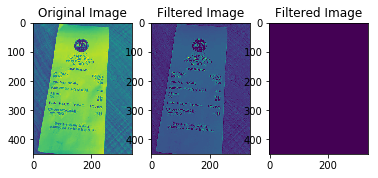

In [13]:
#appling kernels

k = np.array(np.ones((3, 3), np.float32))
    
k = np.array(([0, -1, 0], [-1, 5, -1], [0, -1, 0]), np.float32)/9

print(k)


output = cv2.filter2D(img, -1, k)

ret,thresh1 = cv2.threshold(output,200,255,cv2.THRESH_BINARY)

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(output)
plt.title('Filtered Image')

plt.subplot(1, 3, 3)
plt.imshow(thresh1)
plt.title('Filtered Image')

plt.show()

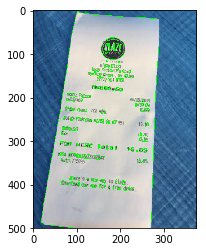

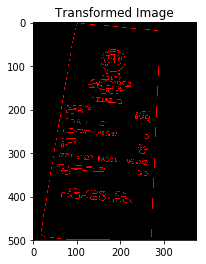

In [7]:
#cannyEdgeDettection
image = cv2.imread(file_path)
image = imutils.resize(image, height = 500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(gray,75,200)


blur = cv2.blur(gray, (3, 3)) # blur the image
ret, thresh = cv2.threshold(blur, 50, 255, cv2.THRESH_BINARY)

im2, cnts, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# create hull array for convex hull points
hull = []

# create contours array
cnt = cnts[0]
 
# calculate points for each contour
for i in range(len(cnts)):
    # creating convex hull object for each contour
    hull.append(cv2.convexHull(cnts[i], False))
    
# create an empty black image
drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)

# draw contours and hull points
for i in range(len(cnts)):
    color_contours = (0, 255, 0) # green - color for contours
    color = (255, 0, 0) # blue - color for convex hull
    # draw ith contour
    cv2.drawContours(image, cnts, i, color_contours, 1, 8, hierarchy)
    # draw ith convex hull object
    cv2.drawContours(drawing, hull, i, color, 1, 8)
    
plt.imshow(image)
plt.show()
plt.imshow(drawing)
plt.title('Transformed Image')
plt.show()

In [ ]:
for i in range(len(cnts)):
    hr_reltn  = ((hierarchy[:,i,3]))
    if hr_reltn < 50:
        print(hr_reltn)
        cnts = cnts[i]

In [ ]:
cnts = imutils.grab_contours(cnts)
print(type(cnts))
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]
print(type(cnts))

for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    print(peri,approx)
    if len(approx) == 4:
        screenCnt = approx
        break

cv2.drawContours(image, [cnts], -1, (0, 255, 0), 5)

plt.imshow(image)
plt.title('Transformed Image')
plt.show()

In [ ]:
warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)

warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
T = threshold_local(warped, 11, offset = 10, method = "gaussian")
warped = (warped > T).astype("uint8") * 255

plt.imshow(image)
plt.title('Transformed Image')
plt.show()

In [ ]:
edgesx = cv2.Scharr(img, -1, dx=1, dy=0, scale=1,
                       delta=0, borderType=cv2.BORDER_DEFAULT)
    
edgesy = cv2.Scharr(img, -1, dx=0, dy=1, scale=1,
                   delta=0, borderType=cv2.BORDER_DEFAULT)

edges = edgesx + edgesy

print(edgesx)

print(edgesy)

output = [img, edgesx, edgesy, edges]
titles = ['Original', 'dx=1 dy=0', 'dx=0 dy=1', 'Edges']

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(output[i], cmap = 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()